<a href="https://colab.research.google.com/github/maximmillion/Aug_Analysis/blob/main/Augmentation_analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
from random import randint
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.pyplot as pp
from tensorflow.keras import datasets, layers, models
%matplotlib inline

# Making Datset:

In [2]:
# Create 250 squares
NUM_SQUARES = 1000
X_train = []
for i in range(NUM_SQUARES):
    exp = np.zeros((28, 28)) #  28*28 canvas 
    x_start = randint(0,27)
    x_end = randint(x_start, 28)
    y_start = randint(0, 27)
    y_end = randint(y_start, 28)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    X_train.append(exp)

In [3]:
# Create 250 circles
for i in range(NUM_SQUARES):
    x = np.arange(0, 28)
    y = np.arange(0, 28)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, 28)
    cy = randint(0, 28)
    r = randint(0, 14)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
print(len(X_train))

2000


In [4]:
Y_train = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])

In [5]:
# Shuffle training data
shuffler = np.random.permutation(NUM_SQUARES*2)

X_train = np.array(X_train)

shufled_X_train = X_train[shuffler]
shufled_Y_train = Y_train[shuffler]

0


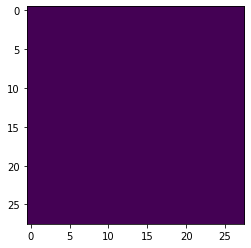

In [6]:
print(shufled_Y_train[0])
plt.imshow(shufled_X_train[0])

In [7]:
NUM_TRAIN = int(NUM_SQUARES*2*0.85)

X_train = shufled_X_train[ : NUM_TRAIN]
Y_train = shufled_Y_train[ : NUM_TRAIN] 

X_test = shufled_X_train[NUM_TRAIN : ]
Y_test = shufled_Y_train[NUM_TRAIN:] 

# MLP on Normal:

In [8]:
def run_mlp(X_train, Y_train, X_test, Y_test, size=28):
    
    FREQ = 5
    accu = []
    for _ in range(FREQ):
        # flatten 
        X_train_flattened = X_train.reshape(len(X_train), size * size)
        X_test_flattened = X_test.reshape(len(X_test), size * size)

        model = keras.Sequential([
            keras.layers.Dense(2, input_shape=(size * size ,), activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(X_train_flattened, Y_train, epochs=5)

        res = model.evaluate(X_test_flattened, Y_test)
        accu.append(res[1])
    
    return sum(accu) / FREQ

In [9]:
accu = run_mlp(X_train, Y_train, X_test, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
54/54 [==============================] - 1s 5ms/step - loss: 0.5802 - accuracy: 0.7341
Epoch 2/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.8229
Epoch 3/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.8382
Epoch 4/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8324
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8033
Epoch 1/5
54/54 [==============================] - 1s 3ms/step - loss: 0.5962 - accuracy: 0.6894
Epoch 2/5
54/54 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7929
Epoch 3/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.8159
Epoch 4/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8265
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7767
Epoch 1/5
54/54 [=============

# MLP on Noisy:

In [10]:
X_train_noisy = []
X_test_noisy = []

for x in X_train:
    X_train_noisy.append(random_noise(x))
    
for x in X_test:
    X_test_noisy.append(random_noise(x))
    
X_train_noisy = np.array(X_train_noisy) 
X_test_noisy = np.array(X_test_noisy)

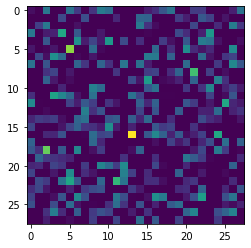

In [11]:
plt.imshow(X_train_noisy[0])

In [12]:
accu = run_mlp(X_train_noisy, Y_train, X_test_noisy, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
54/54 [==============================] - 1s 4ms/step - loss: 0.5936 - accuracy: 0.6553
Epoch 2/5
54/54 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7312
Epoch 3/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7588
Epoch 4/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7771
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.4303 - accuracy: 0.7967
Epoch 1/5
54/54 [==============================] - 1s 4ms/step - loss: 0.5550 - accuracy: 0.7176
Epoch 2/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7641
Epoch 3/5
54/54 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.7865
Epoch 4/5
54/54 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8076
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.4324 - accuracy: 0.7733
Epoch 1/5
54/54 [=============

In [13]:
accu = run_mlp(
    np.concatenate((X_train, X_train_noisy)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_noisy, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
107/107 [==============================] - 1s 3ms/step - loss: 0.5410 - accuracy: 0.7341
Epoch 2/5
107/107 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.7988
Epoch 3/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8174
Epoch 4/5
107/107 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.8212
Epoch 5/5
19/19 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.7833
Epoch 1/5
107/107 [==============================] - 2s 5ms/step - loss: 0.5335 - accuracy: 0.7271
Epoch 2/5
107/107 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.7935
Epoch 3/5
107/107 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.8103
Epoch 4/5
107/107 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.8224
Epoch 5/5
19/19 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.7950
Epoch 1/5
107/

# MLP on Blurred:

In [14]:
X_train_blur = []
X_test_blur = []

for x in X_train:
    X_train_blur.append(gaussian(x, sigma=0.5))
    
for x in X_test:
    X_test_blur.append(gaussian(x, sigma=0.5))
    
X_train_blur = np.array(X_train_blur) 
X_test_blur = np.array(X_test_blur)

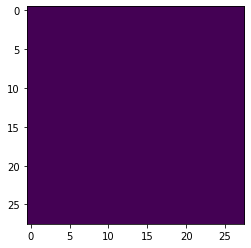

In [15]:
plt.imshow(X_train_blur[0])

In [16]:
accu = run_mlp(X_train_blur, Y_train, X_test_blur, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7194
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8129
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8153
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8376
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8033
Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.6588
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7824
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7988
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8059
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7633
Epoch 1/5
54/54 [=============

In [17]:
accu = run_mlp(
    np.concatenate((X_train, X_train_blur)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_blur, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
107/107 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7471
Epoch 2/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8344
Epoch 3/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8368
Epoch 4/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8450
Epoch 5/5
19/19 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8267
Epoch 1/5
107/107 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7715
Epoch 2/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8129
Epoch 3/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8265
Epoch 4/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8391
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8167
Epoch 1/5
107/

# MLP on Rotated:

In [18]:
from random import choice
from skimage.transform import rotate

In [19]:
angles = [90, 180, 270]

X_train_rot = []
X_test_rot = []

for x in X_train:
    X_train_rot.append(rotate(x, choice(angles)))
    
for x in X_test:
    X_test_rot.append(rotate(x, choice(angles)))
    
X_train_rot = np.array(X_train_rot) 
X_test_rot = np.array(X_test_rot)

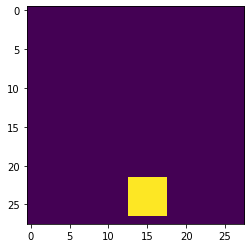

In [20]:
plt.imshow(X_train_rot[1000])

In [21]:
accu = run_mlp(X_train_rot, Y_train, X_test_rot, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6529
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7865
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7988
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8106
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.8100
Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6924
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7753
Epoch 3/5
54/54 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.8024
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.8076
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7500
Epoch 1/5
54/54 [=============

In [22]:
accu = run_mlp(
    np.concatenate((X_train, X_train_rot)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_rot, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
107/107 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7044
Epoch 2/5
107/107 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7868
Epoch 3/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.8044
Epoch 4/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8165
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8150
Epoch 1/5
107/107 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7059
Epoch 2/5
107/107 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7924
Epoch 3/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8053
Epoch 4/5
107/107 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8162
Epoch 5/5
19/19 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8233
Epoch 1/5
107/

# MLP on Scaled:

In [23]:
from skimage.transform import rescale

X_train_sca = []
X_test_sca = []

for x in X_train:
    X_train_sca.append(rescale(x, 0.75, anti_aliasing=False))
    
for x in X_test:
    X_test_sca.append(rescale(x, 0.75, anti_aliasing=False))

    
X_train_sca = np.array(X_train_sca) 
X_test_sca = np.array(X_test_sca)

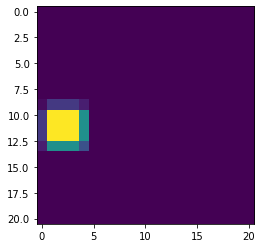

In [24]:
plt.imshow(X_train_sca[1000])

In [25]:
accu = run_mlp(X_train_sca, Y_train, X_test_sca, Y_test, size=21)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7235
Epoch 2/5
54/54 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.8018
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.8112
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8159
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.8267
Epoch 1/5
54/54 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6682
Epoch 2/5
54/54 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.7965
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.8071
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.8235
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7900
Epoch 1/5
54/54 [=============

In [26]:
X_train_sca.shape

(1700, 21, 21)

In [27]:
accu = run_mlp(
    np.concatenate((X_train, X_train_sca)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_sca, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

ValueError: ignored

In [ ]:
X_test_sca.shape

# CNN Function:

In [28]:
def run_cnn(X_train, Y_train, X_test, Y_test, shape = (28, 28, 1)):
    
    FREQ = 5
    accu = []
    for _ in range(FREQ):
        cnn = models.Sequential([
            layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=shape),
            layers.MaxPooling2D((2, 2)),

            layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),

            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(2, activation='softmax')
        ])

        cnn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # reshape Data for Input layer
        x_wanted = X_train.reshape((len(X_train), )+ shape)
        x_wanted.shape

        cnn.fit(x_wanted, Y_train, epochs=10)
        x_wanted = X_test.reshape((len(X_test), )+ shape)
        x_wanted.shape

        res = cnn.evaluate(x_wanted, Y_test)
        accu.append(res[1])
        
    return sum(accu) / FREQ

## CNN on Normal:

In [29]:
accu = run_cnn(X_train, Y_train, X_test, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/10
54/54 [==============================] - 2s 28ms/step - loss: 0.4764 - accuracy: 0.7512
Epoch 2/10
54/54 [==============================] - 1s 27ms/step - loss: 0.2317 - accuracy: 0.9118
Epoch 3/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1714 - accuracy: 0.9288
Epoch 4/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1406 - accuracy: 0.9394
Epoch 5/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1561 - accuracy: 0.9347
Epoch 6/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1269 - accuracy: 0.9424
Epoch 7/10
54/54 [==============================] - 2s 35ms/step - loss: 0.1193 - accuracy: 0.9435
Epoch 8/10
54/54 [==============================] - 3s 51ms/step - loss: 0.1187 - accuracy: 0.9435
Epoch 9/10
54/54 [==============================] - 3s 53ms/step - loss: 0.1148 - accuracy: 0.9453
Epoch 10/10
10/10 [==============================] - 0s 17ms/step - loss: 0.1289 - accuracy: 0.9367
Epoch 1/1

## CNN on noisy:

In [30]:
accu = run_cnn(X_train_noisy, Y_train, X_test_noisy, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/10
54/54 [==============================] - 2s 29ms/step - loss: 0.5401 - accuracy: 0.7176
Epoch 2/10
54/54 [==============================] - 2s 29ms/step - loss: 0.3287 - accuracy: 0.8576
Epoch 3/10
54/54 [==============================] - 2s 28ms/step - loss: 0.2218 - accuracy: 0.8976
Epoch 4/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1787 - accuracy: 0.9194
Epoch 5/10
54/54 [==============================] - 2s 29ms/step - loss: 0.1581 - accuracy: 0.9276
Epoch 6/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1415 - accuracy: 0.9306
Epoch 7/10
54/54 [==============================] - 2s 29ms/step - loss: 0.1243 - accuracy: 0.9424
Epoch 8/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1205 - accuracy: 0.9406
Epoch 9/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1285 - accuracy: 0.9365
Epoch 10/10
10/10 [==============================] - 0s 9ms/step - loss: 0.1413 - accuracy: 0.9200
Epoch 1/10

In [ ]:
accu = run_cnn(
    np.concatenate((X_train, X_train_noisy)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_noisy, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

Epoch 1/10
107/107 [==============================] - 3s 27ms/step - loss: 0.4241 - accuracy: 0.7897
Epoch 2/10
107/107 [==============================] - 3s 27ms/step - loss: 0.1896 - accuracy: 0.9176
Epoch 3/10
107/107 [==============================] - 3s 27ms/step - loss: 0.1426 - accuracy: 0.9332
Epoch 4/10
107/107 [==============================] - 3s 27ms/step - loss: 0.1235 - accuracy: 0.9409
Epoch 5/10
107/107 [==============================] - 3s 27ms/step - loss: 0.1149 - accuracy: 0.9432
Epoch 6/10
107/107 [==============================] - 3s 27ms/step - loss: 0.1060 - accuracy: 0.9479
Epoch 7/10
107/107 [==============================] - 3s 27ms/step - loss: 0.1024 - accuracy: 0.9474
Epoch 8/10
107/107 [==============================] - 3s 27ms/step - loss: 0.0970 - accuracy: 0.9521
Epoch 9/10
107/107 [==============================] - 3s 27ms/step - loss: 0.0968 - accuracy: 0.9518
Epoch 10/10
19/19 [==============================] - 0s 9ms/step - loss: 0.1407 - accuracy:

## CNN on blur:

In [ ]:
run_cnn(X_train_blur, Y_train, X_test_blur, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

In [ ]:
accu = run_cnn(
    np.concatenate((X_train, X_train_blur)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_blur, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

## CNN on Rotated:

In [ ]:
accu = run_cnn(X_train_rot, Y_train, X_test_rot, Y_test)
print('mean accuracy: ', round(accu * 100, 2))

In [ ]:
accu = run_cnn(
    np.concatenate((X_train, X_train_rot)),
    np.concatenate((Y_train, Y_train)), 
    np.concatenate((X_test_rot, X_test)), 
    np.concatenate((Y_test, Y_test))
    )
print('mean accuracy: ', round(accu * 100, 2))

## CNN on Scaled:

In [ ]:
accu = run_cnn(X_train_sca, Y_train, X_test_sca, Y_test, shape = (21, 21, 1))
print('mean accuracy: ', round(accu * 100, 2))

# Creating the bar chart:

## MCP:

In [ ]:
import plotly.express as px

titles = ['Normal', 'Noise', 'Augmented Noise', 'Blur', 'Augmented Blur', 'Random Rotation', 
          'Random Rotation Augmented', 'Scaling']
accus = [82.27, 74.53, 78.43, 80.33, 82.43, 80.73, 83.17, 78.87]

#px.bar(x=titles, y= accus)
plt.barh(titles, accus)

## CNN:

In [ ]:
titles = ['Normal', 'Noise', 'Augmented Noise', 'Blur', 'Augmented Blur', 'Random Rotation', 
          'Random Rotation Augmented', 'Scaling']

accus = [95.33, 91.27, 94.27, 94.27, 94.9, 92.0, 92.27, 92.13]

px.bar(x=titles, y= accus)
plt.barh(titles, accus)

# Some more insights:

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
x_wanted = X_train.reshape(len(X_train), 28, 28, 1)
cnn.fit(x_wanted, Y_train, epochs=10, callbacks=[history])

In [ ]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'], color = 'red', label = 'Loss')
ax.plot(history.history['acc'], color = 'green', label = 'Accuracy')
ax.plot(history.history['f1_m'], color = 'blue', label = 'F1')
ax.plot(history.history['precision_m'], color = 'orange', label = 'precision')
ax.plot(history.history['recall_m'], color = 'purple', label = 'Recall')
plt.show()